# Trends in atmospheric Carbon Dioxide Concentration [21 points]

The carbon dioxide data measured on Mauna Loa in Hawaii constitute the longest record of direct measurements of CO$_2$ in the atmosphere. They were started by C. David Keeling of the Scripps Institution of Oceanography in March of 1958 at a facility of the National Oceanic and Atmospheric Administration [Keeling, 1976]. NOAA started its own CO$_2$ measurements in May of 1974, and they have run in parallel with those made by Scripps since then [Thoning, 1989].

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

## Load in the data [1 points]

<font color=goldenrod>**_Code for you to write_**</font>

Load the data from `'Data/monthly_in_situ_co2_mlo_2023.csv` and use `tail`, `head`, or `describe` to check it.

In [2]:
# Monthly Average Carbon Dioxide Concentration in parts per million (ppm) 
# measured at Mauna Loa Observatory, Hawaii
# source: https://scripps.ucsd.edu/programs/keelingcurve/permissions-and-data-sources/
co2_mlo = pd.read_csv('data/monthly_in_situ_co2_mlo_2023.csv')
co2_mlo.head()
# co2_mlo.tail()
# co2_mlo.describe()

,Yr,Mn,Date,YearDate,CO2raw[ppm],CO2season_adjusted[ppm],CO2fit[ppm],CO2seasonally_fit[ppm],CO2filled[ppm],CO2seasonally_filled[ppm],Sta
0,1958,3,21259,1958.2027,315.71,314.44,316.19,314.91,315.71,314.44,MLO
1,1958,4,21290,1958.2877,317.45,315.16,317.30,314.99,317.45,315.16,MLO
2,1958,5,21320,1958.3699,317.51,314.69,317.89,315.07,317.51,314.69,MLO
3,1958,6,21351,1958.4548,-99.99,-99.99,317.27,315.15,317.27,315.15,MLO
4,1958,7,21381,1958.5370,315.87,315.20,315.86,315.22,315.87,315.20,MLO


Notice that we have a range of different CO2 columns. We will be using the **CO2filled** column since this has been treated to fill in missing data.

If you do everything correctly you'll have 784 data points.

In [3]:
co2_mlo_clean = co2_mlo[['Yr', 'Mn', 'Date', 'YearDate', 'CO2filled[ppm]', 'Sta']]

## Plot the data [2 points]

<font color=goldenrod>**_Code for you to write_**</font>

Plot the data, CO$_{2}$ concentration (`CO2filled[ppm]`)
as a function of `YearDate`. Don't forget to label the axes and give a title.

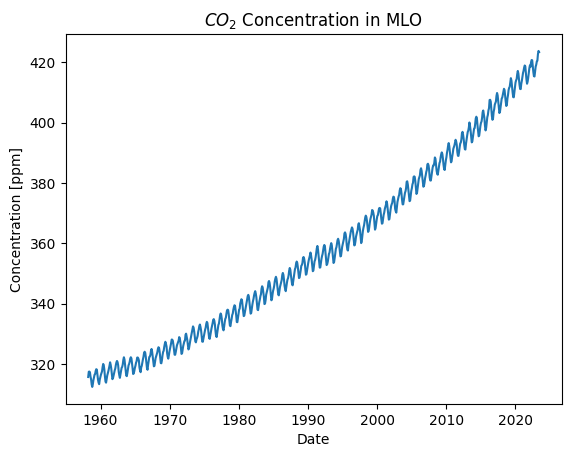

In [4]:
plt.plot(co2_mlo_clean['YearDate'], co2_mlo_clean['CO2filled[ppm]'], label=r'$CO_2')
plt.title(r'$CO_2$ Concentration in MLO')
plt.xlabel('Date')
plt.ylabel('Concentration [ppm]')
plt.show()

## Fit a linear model to the data [5 points: 4 for code, 1 for written answer]

<font color=goldenrod>**_Code for you to write_**</font>

1. Use `np.polyfit()` to determine the best-fit linear (i.e. degree 1) model to the CO$_{2}$ data

2. Use `np.polyval()` to find the model CO$_2$ concentration ($y$ values) for the dates ($x$ values).

3. Plot the data and the best-fit line. Add labels and a title.

4. Calculate and plot the residual. Add a horizontal line to show zero, as we did in class. Add labels and a title.

**NOTE:** remember to use the `YearDate` and `CO2filled[ppm]` series

In [5]:
#1. Best linear fit. Values should be 1.61e+00, -2.86e+03
# help(np.polyfit)
linear_coef = np.polyfit(co2_mlo_clean['YearDate'], co2_mlo_clean['CO2filled[ppm]'], deg=1)
print(linear_coef)

[ 1.61772718e+00 -2.86258503e+03]


In [6]:
#2. Generate modelled y-values for this fit
# help(np.polyval)
y_linear_fit = np.polyval(linear_coef, co2_mlo_clean['YearDate'])
# yy_linear_fit

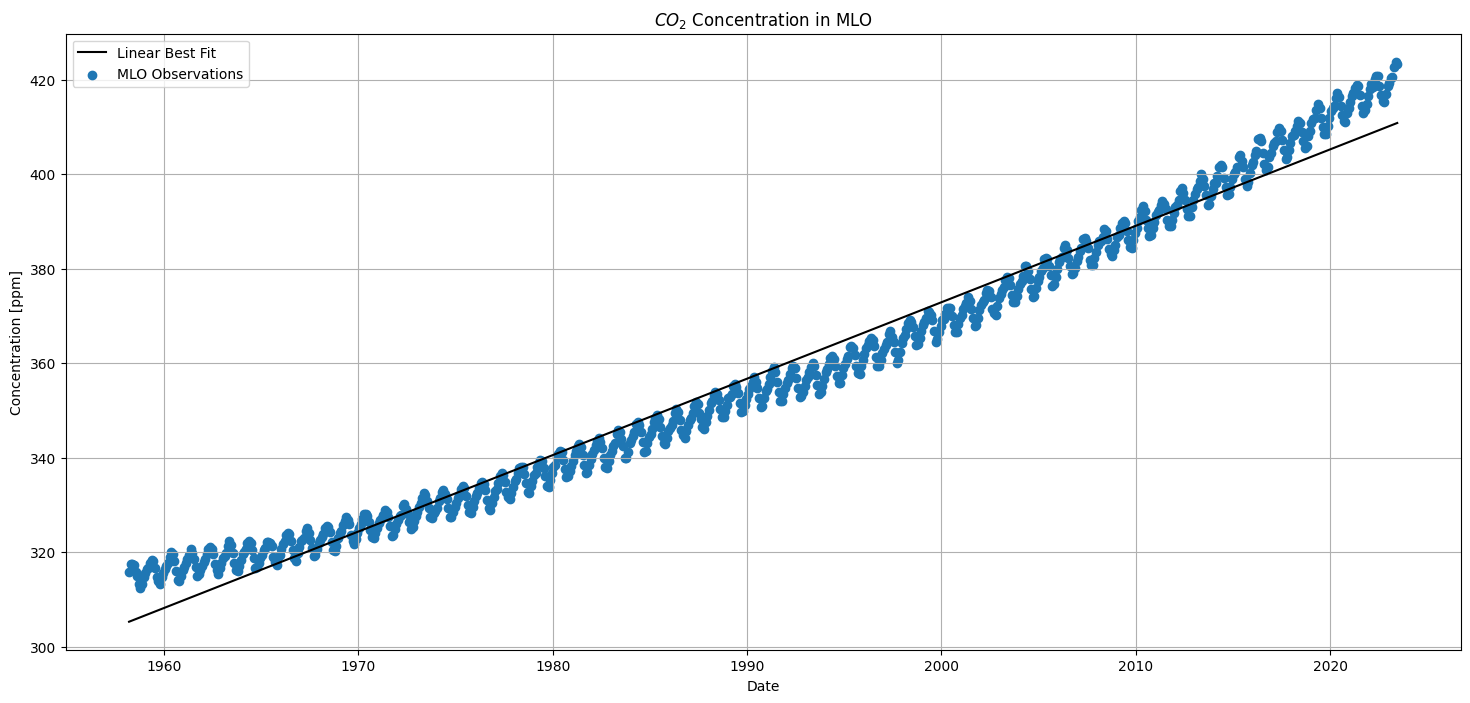

In [7]:
#3. Plot the data and best fit line
plt.figure(figsize=(18,8))
plt.plot(co2_mlo_clean['YearDate'], y_linear_fit, label='Linear Best Fit', color='black')
plt.scatter(co2_mlo_clean['YearDate'], co2_mlo_clean['CO2filled[ppm]'], label='MLO Observations')

plt.title(r'$CO_2$ Concentration in MLO')
plt.xlabel('Date')
plt.ylabel('Concentration [ppm]')

plt.legend()
plt.grid()
plt.show()

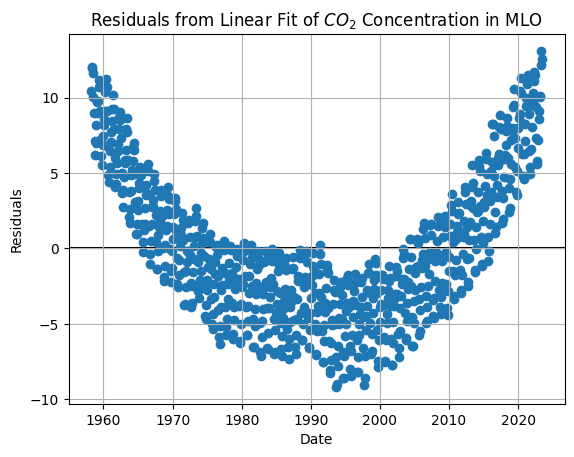

In [8]:
#4. Calculate and plot the residuals
residuals = co2_mlo_clean['CO2filled[ppm]']-y_linear_fit # obs - modelled
plt.scatter(co2_mlo_clean['YearDate'], residuals)

plt.title(r'Residuals from Linear Fit of $CO_2$ Concentration in MLO')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', zorder=0)
plt.grid()
plt.show()

<font color=red>**Question:**</font> Judging from the residuals, is a linear fit appropriate or not? Explain what feature of the residuals tells you this.  **[1 points]**

**Write your answer in the box below**

The linear fit is not appropriate. A good fit would have a fair mix around zero, but there still appears to be a pattern to the residuals hinting to a quadratic pattern that the linear fit cannot account for. 

## Fit a quadratic model to the data [4 points]

<font color=goldenrod>**_Code for you to write_**</font>

1. Use `np.polyfit()` to determine the best-fit linear (i.e. degree 2) model to the CO$_{2}$ data

2. Use `np.polyval()` to find the model CO$_2$ concentration ($y$ values) for the dates ($x$ values).

3. Plot the data and the best-fit line.

4. Calculate and plot the residual.

**NOTE:** remember to use the `YearDate` and `CO2filled[ppm]` series

In [9]:
#1. Best quadratic fit. Values should be 1.34e-02 -5.20e+01 5.05e+04
quad_coeff = np.polyfit(co2_mlo_clean['YearDate'], co2_mlo_clean['CO2filled[ppm]'], deg=2)

In [10]:
#2. Generate modelled y-values for this fit
y_quad_fit = np.polyval(quad_coeff, co2_mlo_clean['YearDate'])

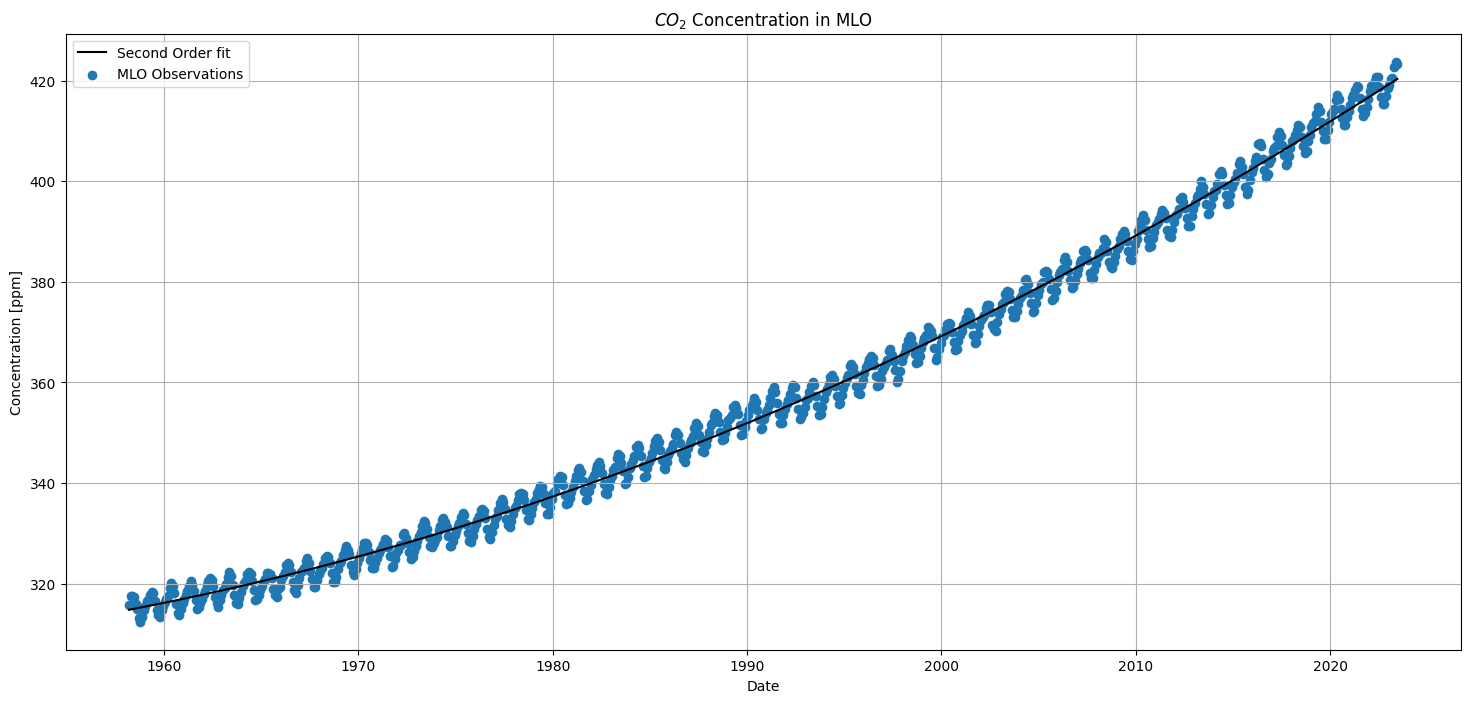

In [11]:
#3. Plot the data and best fit line
plt.figure(figsize=(18,8))
plt.plot(co2_mlo_clean['YearDate'], y_quad_fit, label='Second Order fit', color='black')
plt.scatter(co2_mlo_clean['YearDate'], co2_mlo_clean['CO2filled[ppm]'], label='MLO Observations')

plt.title(r'$CO_2$ Concentration in MLO')
plt.xlabel('Date')
plt.ylabel('Concentration [ppm]')

plt.legend()
plt.grid()
plt.show()

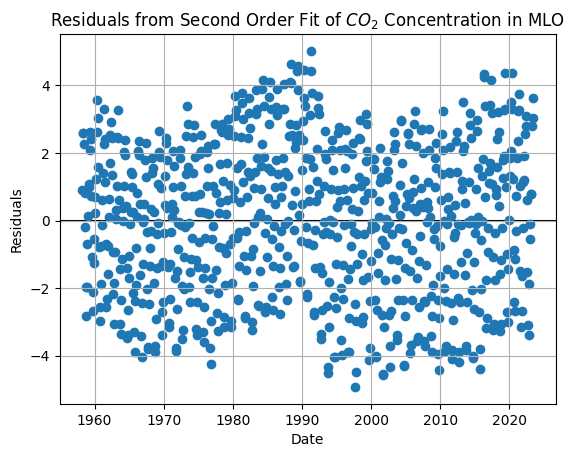

In [12]:
#4. Calculate and plot the residual
quad_residuals = co2_mlo_clean['CO2filled[ppm]']-y_quad_fit # obs - modelled
plt.scatter(co2_mlo_clean['YearDate'], quad_residuals)

plt.title(r'Residuals from Second Order Fit of $CO_2$ Concentration in MLO')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', zorder=0)
plt.grid()
plt.show()

## Quantitative determination of the better fit [2 points]

In class, we use the R-squared value to determine the best fit. 

<font color=goldenrod>**_Code for you to write_**</font>

- Calculate the R-squared values of the linear and quadratic fit

In [13]:
def calc_r2(obs, predicted):
    '''
    calculates the R-squared value. 
    R**2 = 1 - SS_res/SS_tot
    SS_res = SUM(obs - model)**2
    SS_tot = SUM(obs - mean(obs))**2

    return R**2 value. 
    '''
    SS_res = np.sum(np.subtract(obs,predicted)**2)         # Sum of Squares of Residuals
    SS_tot = np.sum(np.subtract(obs,np.mean(obs))**2)     # Total Sum of Squares (SStot)
    r2 = 1-(SS_res/SS_tot)
    return r2

#Residual for linear fit should be 0.9755
r2_linear = calc_r2(co2_mlo_clean['CO2filled[ppm]'], y_linear_fit)

#Residual for quadratic fit should be 0.9948
r2_quad = calc_r2(co2_mlo_clean['CO2filled[ppm]'], y_quad_fit)

print(f'Linear Model R\u00b2 Value: {r2_linear:.4f}')
print(f'Quadratic Model R\u00b2 Value: {r2_quad:.4f}')

Linear Model R² Value: 0.9755
Quadratic Model R² Value: 0.9948


## Which fit is better and what does that tell us? [2 points]

<font color=red>**Question:**</font> Is the quadratic (degree 2) curve fit better or worse than the linear (degree 1) model? What does that tell you about the rate of increase in atmospheric CO$_2$ concentation with time?  **[2 points]**

**Write your answer in the box below**

The quadrtaic curve fit better. This means that the CO$_2$ is not a simple linear relationship with time. But because the linear curve fit well this shows there is some type of trend to the data. 

## What will CO$_2$ concentrations be in 2050 (if the same trend continues)? [3 points]

<font color=goldenrod>**_Code for you to write_**</font>

Calculate what the atmospheric CO$_2$ levels will be for every year between 1950 and 2050 if the CO$_2$ concentration continues along **both the linear and quadratic trends**. 

1. Use one of `range`, `np.arange`, or `np.linspace` to create your array of x-values to predict for
2. Predict the y-values at these x-values for both the linear and quadratic models
3. Plot an x-y plot of the original data and two lines showing the predicted models
4. Write out the CO2 concentration in the year 2050 following both the **linear and quadratic models**

**NOTE:** remember to use the `YearDate` and `CO2filled[ppm]` series

In [14]:
co2_mlo_clean

,Yr,Mn,Date,YearDate,CO2filled[ppm],Sta
0,1958,3,21259,1958.2027,315.71,MLO
1,1958,4,21290,1958.2877,317.45,MLO
2,1958,5,21320,1958.3699,317.51,MLO
3,1958,6,21351,1958.4548,317.27,MLO
4,1958,7,21381,1958.5370,315.87,MLO
...,...,...,...,...,...,...
779,2023,2,44972,2023.1260,420.33,MKO
780,2023,3,45000,2023.2027,420.51,MLO
781,2023,4,45031,2023.2877,422.73,MLO
782,2023,5,45061,2023.3699,423.78,MLO


In [15]:
#1. Create an array of x-values between 1950 and 2050 to predict for 
x_range = np.arange(1950, 2050+1, 1/12)
len(x_range)
# co2_mlo_clean[(co2_mlo_clean['YearDate']>1980) & (co2_mlo_clean['YearDate']<1981)]

1212

In [16]:
#2. Predict the y-values at these x-values for both the linear and quadratic models
linear_projection = np.polyval(linear_coef, x_range)

quad_projection = np.polyval(quad_coeff, x_range)


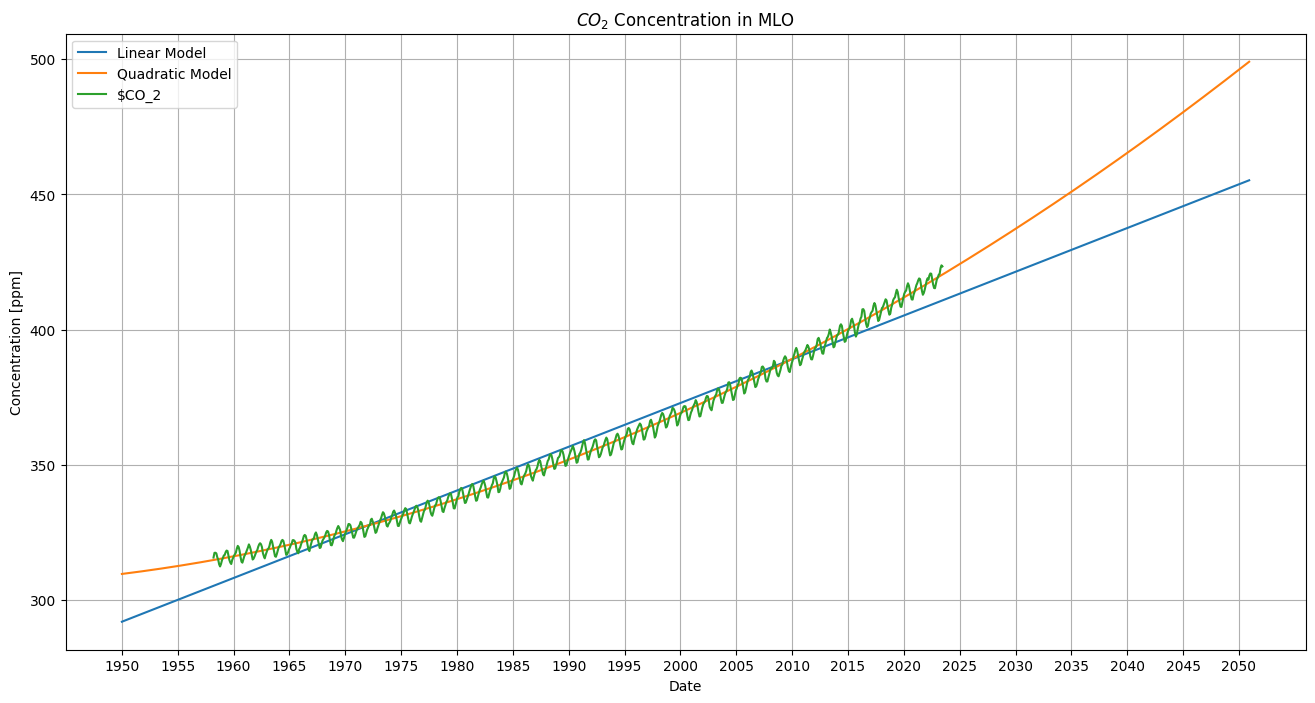

In [17]:
#3. Plot an x-y plot of the original data and two lines showing the predicted models
plt.figure(figsize=(16,8))

plt.plot(x_range, linear_projection, label=r'Linear Model')
plt.plot(x_range, quad_projection, label=r'Quadratic Model')
plt.plot(co2_mlo_clean['YearDate'], co2_mlo_clean['CO2filled[ppm]'], label=r'$CO_2')

plt.title(r'$CO_2$ Concentration in MLO')
plt.xlabel('Date')
plt.ylabel('Concentration [ppm]')
plt.legend()
plt.xticks(np.arange(1950, 2055, 5))
plt.grid()
plt.show()

In [18]:
#4. Write out the CO2 concentration in the year 2050 following both the linear and quadratic models
#Value for 2050 for linear fit should be 453.756
#Value for 2050 for quadratic fit should be 496.132
# help(np.polyval)
linear_2050val = np.polyval(linear_coef, 2050)
quad_2050val = np.polyval(quad_coeff, 2050)
print(f'Linear 2050 estimate: {linear_2050val:.3f}ppm')
print(f'Quadtric 2050 estimate: {quad_2050val:.3f}ppm')


Linear 2050 estimate: 453.756ppm
Quadtric 2050 estimate: 496.132ppm


For the linear and quadratic fits you should get CO2 concentration in 2050 of around 450 and just less than 500 ppm, respectively.

## Why is there a periodic oscillation in the data? [2 points]

<font color=red>**Question:**</font> You should see that there is periodic structure in the data and in the residual plot, sometimes described as a "saw-tooth" pattern. Look at the time-scale of this periodic variation. Do some research on your own and write up a paragraph describing why there is such up and down variability in addition to the long-term trend.?  **[2 points]**

**Write your answer in the box below**

Through visual inspection and $R^2$ values, we know that our linear and second-order quadratic models understood the the annual trend of the $CO_2$ concentrations through the record. However, if we look at the residuals in smaller time window, we see that there is an underlying pattern that our models are not accounting for. In the image below we see a saw-tooth pattern that shows there is a periodic change that the model cannot predict on a sub-annual interval. 
![Risiduals Saw Tooth](images/residual_saw_tooth.png)

This seasonal variation can be attributed to the seasonal lifecyles of $CO_2$ absorbing plants and phytoplankton. In the Northern Hemisphere's winter, photosynthesis slows down dramatically and we see the atmosphere has higher $CO_2$ levels. During the NH Summer, plants and phytoplankton take in more $CO_2$ leading to a net decrease of atmospheric $CO_2$. Reaching the atmospheric $CO_2$ minimum at the end of the growing season.  

![Seasonal Changes](images/season_co2.png)


### Turn in this notebook

Save your completed notebook.

In [59]:
co2_mlo_clean

,Yr,Mn,Date,YearDate,CO2filled[ppm],Sta
0,1958,3,21259,1958.2027,315.71,MLO
1,1958,4,21290,1958.2877,317.45,MLO
2,1958,5,21320,1958.3699,317.51,MLO
3,1958,6,21351,1958.4548,317.27,MLO
4,1958,7,21381,1958.5370,315.87,MLO
...,...,...,...,...,...,...
779,2023,2,44972,2023.1260,420.33,MKO
780,2023,3,45000,2023.2027,420.51,MLO
781,2023,4,45031,2023.2877,422.73,MLO
782,2023,5,45061,2023.3699,423.78,MLO


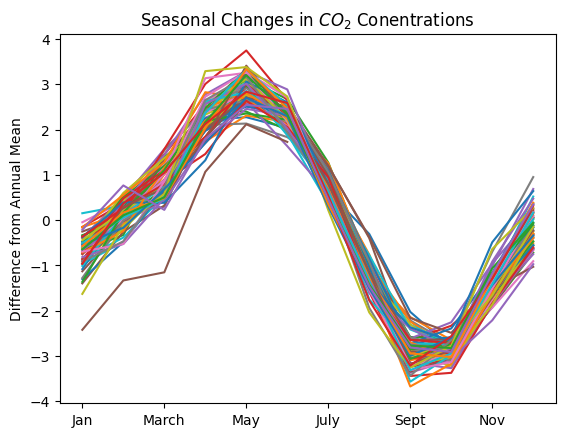

In [58]:
import warnings
warnings.filterwarnings('ignore')
for year in co2_mlo_clean['Yr'].unique():
    df = co2_mlo_clean[co2_mlo_clean['Yr']==year]
    df_avg = df['CO2filled[ppm]'].mean()
    df['CO2_flux'] = df['CO2filled[ppm]'] - df_avg
    
    plt.plot(df['Mn'], df['CO2_flux'])
plt.title('Seasonal Changes in $CO_2$ Conentrations')

tick_pos = np.arange(1, 13, 2)
tick_label = ['Jan', 'March', 'May', 'July', 'Sept', 'Nov']
plt.xticks(tick_pos, tick_label)
# plt.xlabel('Month')
plt.ylabel('Difference from Annual Mean')
plt.savefig('images/season_co2')

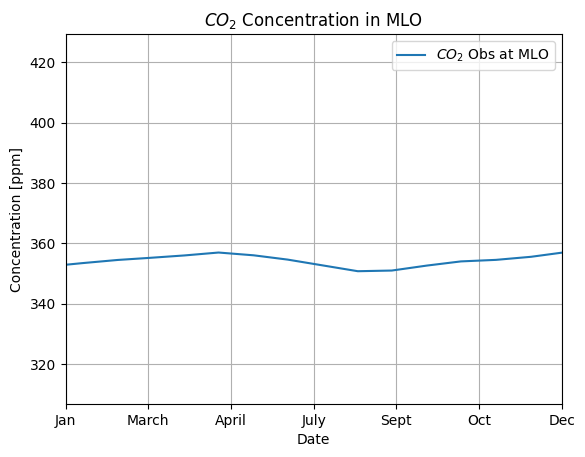

In [34]:
plt.plot(co2_mlo_clean['YearDate'], co2_mlo_clean['CO2filled[ppm]'], label=r'$CO_2$ Obs at MLO')

plt.title(r'$CO_2$ Concentration in MLO')
plt.xlabel('Date')
plt.ylabel('Concentration [ppm]')
plt.legend()
plt.grid()
plt.xlim(1990,1991)

tick_pos = np.arange(1990, 1991.2, .2)
tick_label = ['Jan', 'March', 'April', 'July', 'Sept', 'Oct', 'Dec']
plt.xticks(tick_pos, tick_label)

plt.show()

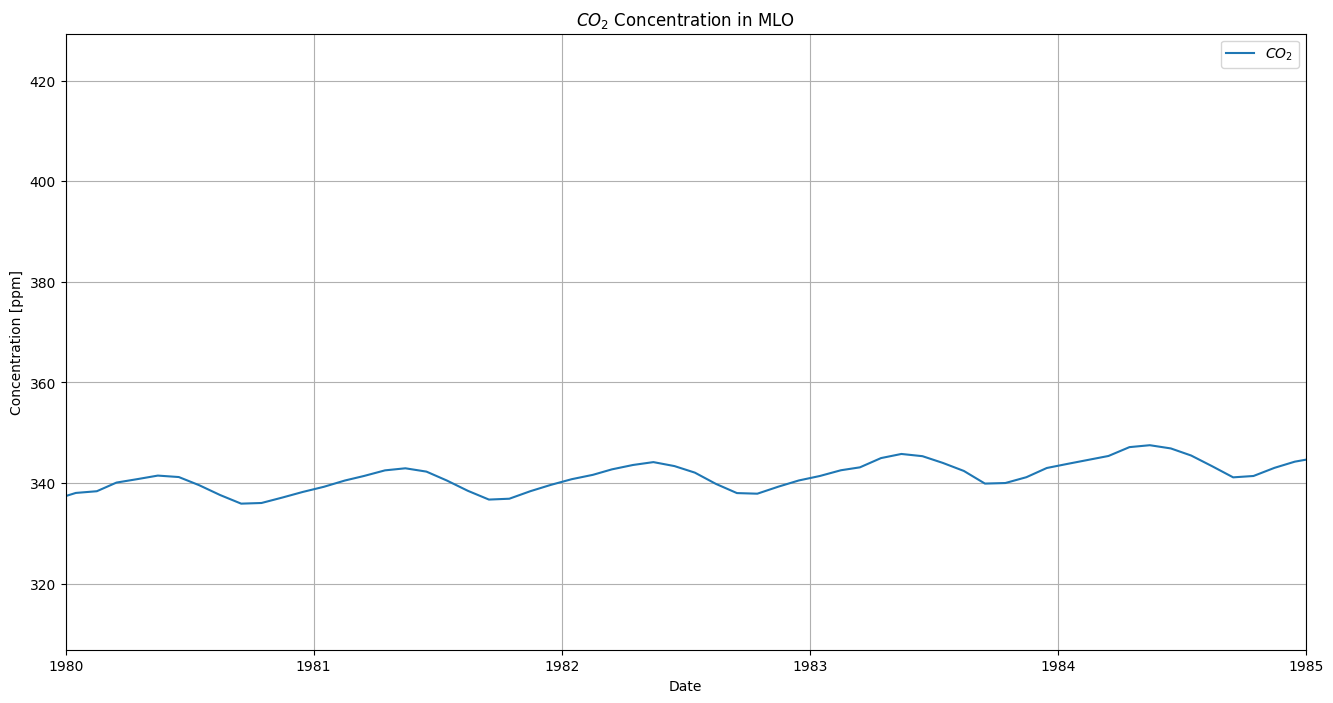

In [26]:
plt.figure(figsize=(16,8))

# plt.plot(x_range, linear_projection, label=r'Linear Model')
# plt.plot(x_range, quad_projection, label=r'Quadratic Model')
plt.plot(co2_mlo_clean['YearDate'], co2_mlo_clean['CO2filled[ppm]'], label=r'$CO_2$')

plt.title(r'$CO_2$ Concentration in MLO')
plt.xlabel('Date')
plt.ylabel('Concentration [ppm]')
plt.legend()
# plt.xticks(np.arange(1950, 2055, 5))
plt.xlim(1980, 1985)
plt.grid()
plt.show()

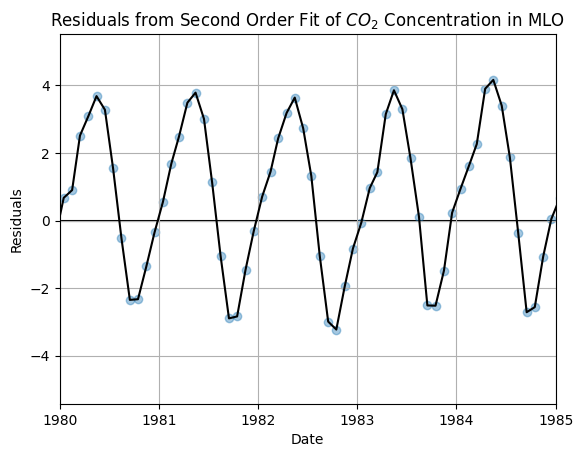

In [62]:
# Looking into residuals to see the saw-tooth pattern. 
quad_residuals = co2_mlo_clean['CO2filled[ppm]']-y_quad_fit # obs - modelled
plt.scatter(co2_mlo_clean['YearDate'], quad_residuals, alpha=.4)
plt.plot(co2_mlo_clean['YearDate'], quad_residuals, color='black')

plt.title(r'Residuals from Second Order Fit of $CO_2$ Concentration in MLO')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', zorder=0)
plt.grid()
plt.xlim(1980,1985)
plt.savefig('images/residual_saw_tooth')